<a href="https://colab.research.google.com/github/horsinnaround/Data-Science/blob/main/Copy_of_Work_16_Corona_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and Setups

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
import os
sns.set_context('notebook')
sns.set_theme(style="whitegrid")
sns.set_style('whitegrid')
# sns.set_palette('tab10')
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
sns.set_context("paper")
path = '/content/drive/MyDrive/work 16 Corona NLP/'
# os.mkdir(path)

In [ ]:
def p2(path,fold):
    g = f'{path}{fold}'
    os.mkdir(g)
    return g

In [ ]:
# p = p2(path,'l1')

# Data

In [ ]:
# ! unzip '/content/drive/MyDrive/work 16 Corona NLP/archive.zip'

In [8]:
import pandas as pd
train_ = pd.read_csv('/content/drive/MyDrive/work 16 Corona NLP/train/Corona_NLP_train.csv',encoding='latin-1')
test_ = pd.read_csv('/content/drive/MyDrive/work 16 Corona NLP/train/Corona_NLP_test.csv',encoding='latin-1')


In [ ]:
train_.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [9]:
train_ = train_[['Sentiment','OriginalTweet']]
test_ = test_[['Sentiment','OriginalTweet']]

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
import re

def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    # df[text_field] = df[text_field].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"'", "", elem)) 
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ", elem))
    # df[text_field] = df[text_field].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    # df[text_field] = df[text_field].apply(lambda x: ' '.join([word for word in x.split() if len(word)>2 ]))
    # df[text_field] = df[text_field].apply(lambda elem: re.sub(r"([0-9])", " ", elem))  

    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"  ", " ", elem))  

    return df
    train = clean_text(train_,'OriginalTweet');

In [ ]:
train = clean_text(train_,'OriginalTweet');
test = clean_text(test_,'OriginalTweet');

In [ ]:
# 5 to 3
set(train.Sentiment)

{'Extremely Negative', 'Extremely Positive', 'Negative', 'Neutral', 'Positive'}

In [ ]:
train.Sentiment.replace({'Extremely Negative':'Negative','Extremely Positive':'Positive'},inplace=True)
test.Sentiment.replace({'Extremely Negative':'Negative','Extremely Positive':'Positive'},inplace=True)


# Counts

In [ ]:
# p2(path,'count')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


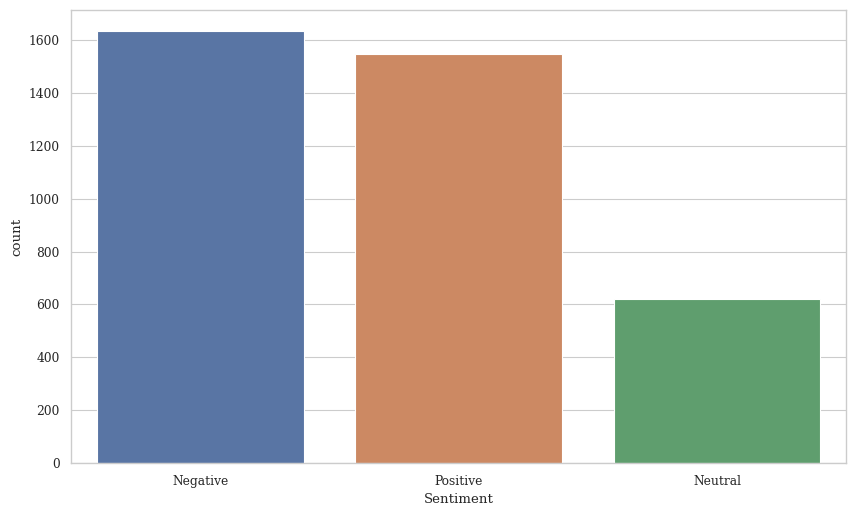

In [ ]:
sns.countplot(test['Sentiment'])
plt.savefig("/content/drive/MyDrive/work 16 Corona NLP/count/balancedtest.png",bbox_inches='tight')

In [ ]:
train['Sentiment'].to_csv('/content/drive/MyDrive/work 16 Corona NLP/count/train.csv')
test['Sentiment'].to_csv('/content/drive/MyDrive/work 16 Corona NLP/count/test.csv')

# Some machine learning stuff

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC, NuSVC
from sklearn import model_selection
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix, cohen_kappa_score, roc_auc_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, jaccard_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression,Ridge,RidgeCV,Lasso,LassoLars,BayesianRidge,TweedieRegressor
from keras.models import Sequential
from keras.layers import *
from keras import layers
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB


In [ ]:
set(train['Sentiment'])

{'Negative', 'Neutral', 'Positive'}

In [ ]:
train['Sentiment'].replace({"Negative":0,"Neutral":1,"Positive":2},inplace=True)
test['Sentiment'].replace({"Negative":0,"Neutral":1,"Positive":2},inplace=True)

In [ ]:
# tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', ngram_range=(1,1))
# tfidffitted = tfidf.fit(train.OriginalTweet)
# X = tfidffitted.transform(train.OriginalTweet).toarray()
Y = train['Sentiment'].to_numpy()
# x = tfidffitted.transform(test.OriginalTweet).toarray()
y = test['Sentiment'].to_numpy()

# X.shape,x.shape

In [ ]:
pca = PCA(n_components=8)
Xp = pca.fit_transform(X)
xp = pca.transform(x)

In [ ]:
df = pd.DataFrame(Xp,columns=[f"Col {i}" for i in range(8)])
df['Label'] = list(Y)

In [ ]:
sns.pairplot(data=df,hue='Label')

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
# One hot encoding train labels
b = np.zeros((Y.size, Y.max() + 1))
b[np.arange(Y.size), Y] = 1
Y2 = b
# One hot encoding train labels
b = np.zeros((y.size, y.max() + 1))
b[np.arange(y.size), y] = 1
y2 = b

TypeError: ignored

In [ ]:

tf.keras.backend.clear_session()
model = tf.keras.Sequential()
model.add(Input( shape=(X.shape[1],)))
# model.add(layers.Conv1D(14, 4, activation='relu',input_shape=(X.shape[1],1),kernel_regularizer = tf.keras.regularizers.L2(0.000001)))
# model.add(Flatten())
# model.add(layers.AveragePooling1D(2))
model.add(layers.Dense(64,'relu',kernel_regularizer = tf.keras.regularizers.L2(0.0001)))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(32,'relu',kernel_regularizer = tf.keras.regularizers.L2(0.0001)))
model.add(layers.Dropout(0.45))


model.add(layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adamax',loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
num_epochs =15
# early_stop = EarlyStopping(monitor='val_loss', patience=6,restore_best_weights=True)
history = model.fit(X,
                    Y2,
                    batch_size=32,
                    epochs=num_epochs, 
                    validation_split=0.2,
                    # validation_data=[x,y],
                    # callbacks =[early_stop],
                    # verbose=0
                    )

# Embedding

In [ ]:
train.columns

Index(['Sentiment', 'OriginalTweet'], dtype='object')

In [ ]:
train['len']= train['OriginalTweet'].apply(len)

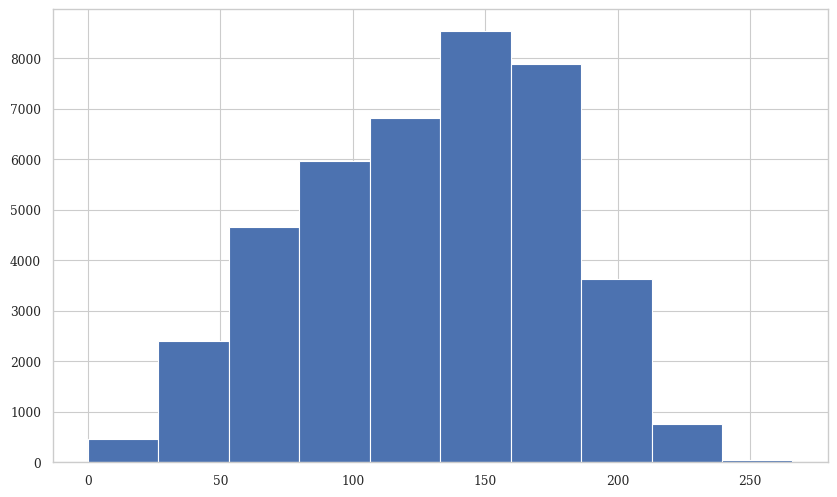

In [ ]:
train['len'].hist()

In [ ]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [ ]:
maxlen = 250
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train.OriginalTweet)
Xsequences = tokenizer.texts_to_sequences(train.OriginalTweet)
xsequences = tokenizer.texts_to_sequences(test.OriginalTweet)

In [ ]:
tokenizer.word_index

In [ ]:
trainpadded = pad_sequences(Xsequences, maxlen=maxlen)
testpadded = pad_sequences(xsequences, maxlen=maxlen)

In [ ]:
trainpadd = trainpadded[train[train['Sentiment']==1].index,:]
yr = np.array(train['Sentiment'])
b = np.where(yr==1)
r = np.array(b[0])
trainpadd = trainpadded[r]

In [ ]:
from collections import Counter
a = dict(Counter(np.array(trainpadd).flatten()))
kljs = dict(sorted(a.items(), key=lambda item: item[0]))
klj = np.array(list(kljs.values()))
a = dict(Counter(np.array(trainpadd).flatten()))
kljs = dict(sorted(a.items(), key=lambda item: item[0]))
klj = np.array(list(kljs.values()))

In [ ]:
b1 = klj

In [ ]:
b0 = klj

In [ ]:
b2 = klj

In [ ]:
# 'truthful':"Truthful","deceptive":"Deceptive"
ii = 5
jj = ii + 250
plt.plot(range(len(b0))[ii:jj],b0[ii:jj],label="0")
plt.plot(range(len(b1))[ii:jj],b1[ii:jj],label='1')
plt.plot(range(len(b2))[ii:jj],b2[ii:jj],label='2')
# plt.title('Word Frequency by Index')
# plt.xlabel('Word Index')
# plt.ylabel("Word Frequency")
plt.legend()
# ax2 = plt.axes([0.4, 0.45, 0.25, 0.25])
# ax2.plot(range(len(klj))[2:300],klj[2:300])

# plt.savefig(f'{path}word_frequency_for_two_class.png',bbox_inches='tight')
# plt.show()

In [ ]:
embedding_dim = 100

In [ ]:
# model.add(layers.Conv1D(14, 4, activation='relu',input_shape=(X.shape[1],1)))
# model.add(Flatten())
# model.add(layers.AveragePooling1D(2))

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense,Conv1D,GlobalAveragePooling1D,Dropout,MaxPooling1D
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Conv1D(128, 2, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Conv1D(128, 2, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Conv1D(128, 2, activation='relu'))
# model.add(Flatten())
model.add(GlobalAveragePooling1D())
# model.add(Dense(32, activation='relu',kernel_regularizer = tf.keras.regularizers.L2(0.0001)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu',kernel_regularizer = tf.keras.regularizers.L2(0.0001)))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))
model.summary()
model.compile(optimizer='adamax',loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 250, 100)          1000000   
                                                                 
 conv1d_20 (Conv1D)          (None, 249, 128)          25728     
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 124, 128)         0         
 1D)                                                             
                                                                 
 conv1d_21 (Conv1D)          (None, 123, 128)          32896     
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 61, 128)          0         
 1D)                                                             
                                                                 
 conv1d_22 (Conv1D)          (None, 60, 128)         

In [ ]:
ACCURACY_THRESHOLD = 0.85
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(float(logs.get('val_accuracy')) > ACCURACY_THRESHOLD):   
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))   
            self.model.stop_training = True

mCallback = myCallback()

In [ ]:
num_epochs =25
# early_stop = EarlyStopping(monitor='val_accuracy', patience=6,restore_best_weights=True)
history = model.fit(trainpadded,
                    Y2,
                    batch_size=32,
                    epochs=num_epochs, 
                    validation_split=0.2,
                    # validation_data=[x,y],
                    callbacks =[mCallback],
                    # verbose=0
                    )

Epoch 1/25
1029/1029 [==============================] - 8s 7ms/step - loss: 0.9915 - accuracy: 0.4510 - val_loss: 0.9310 - val_accuracy: 0.5232
Epoch 2/25
1029/1029 [==============================] - 6s 6ms/step - loss: 0.8845 - accuracy: 0.5783 - val_loss: 0.8243 - val_accuracy: 0.6444
Epoch 3/25
1029/1029 [==============================] - 6s 6ms/step - loss: 0.7717 - accuracy: 0.6798 - val_loss: 0.7369 - val_accuracy: 0.6931
Epoch 4/25
1029/1029 [==============================] - 8s 8ms/step - loss: 0.6747 - accuracy: 0.7398 - val_loss: 0.6758 - val_accuracy: 0.7336
Epoch 5/25
1029/1029 [==============================] - 6s 6ms/step - loss: 0.6057 - accuracy: 0.7771 - val_loss: 0.6499 - val_accuracy: 0.7464
Epoch 6/25
1029/1029 [==============================] - 6s 6ms/step - loss: 0.5550 - accuracy: 0.8022 - val_loss: 0.6392 - val_accuracy: 0.7539
Epoch 7/25
1029/1029 [==============================] - 6s 6ms/step - loss: 0.5158 - accuracy: 0.8210 - val_loss: 0.6503 - val_accuracy:

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import logging
logging.basicConfig(level=logging.INFO)

In [ ]:
!wget --quiet https://raw.githubusercontent.com/tensorflow/models/master/official/nlp/bert/tokenization.py

In [ ]:
pip install tokenization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow_hub as hub
from bert import tokenization
module_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2'
bert_layer = hub.KerasLayer(module_url, trainable=True)

In [ ]:
# !pip install bert-tensorflow

In [ ]:
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

def bert_encode(texts, tokenizer, max_len=512):
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = tokenizer.tokenize(text)
            
        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len - len(input_sequence)
        
        tokens = tokenizer.convert_tokens_to_ids(input_sequence) + [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
    
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

AttributeError: ignored

In [ ]:
def build_model(bert_layer, max_len=512):
    input_word_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    input_mask = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    segment_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="segment_ids")

    pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
    clf_output = sequence_output[:, 0, :]
    net = tf.keras.layers.Dense(64, activation='relu')(clf_output)
    net = tf.keras.layers.Dropout(0.2)(net)
    net = tf.keras.layers.Dense(32, activation='relu')(net)
    net = tf.keras.layers.Dropout(0.2)(net)
    out = tf.keras.layers.Dense(5, activation='softmax')(net)
    
    model = tf.keras.models.Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
    model.compile(tf.keras.optimizers.Adam(lr=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model


In [ ]:
# train['Review'] = (train['title'].map(str) +' '+ train['body']).apply(lambda row: row.strip())
# test['Review'] = (test['title'].map(str) +' '+ test['body']).apply(lambda row: row.strip())


In [ ]:
train.OriginalTweet.values

In [ ]:
pip install bert-tensorflow==1.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!wget --quiet https://raw.githubusercontent.com/tensorflow/models/master/official/nlp/bert/tokenization.py

In [ ]:
max_len = 150
train_input = bert_encode(train.OriginalTweet.values, tokenizer, max_len=max_len)
test_input = bert_encode(test.OriginalTweet.values, tokenizer, max_len=max_len)
train_labels = tf.onclick="parent.postMessage({'referent':'.tensorflow.keras'}, '*')">keras.utils.to_categorical(train.label.values, num_classes=3)


NameError: ignored

In [ ]:
!unzip '/content/drive/MyDrive/glove.6B.zip'

In [ ]:
glove_dir = '/content/'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.300d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
word_index = tokenizer.word_index

In [ ]:
embedding_dim = 300
max_words = max_words
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [ ]:
embedding_matrix.shape

(10000, 300)

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adamax',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
num_epochs =25
# early_stop = EarlyStopping(monitor='val_accuracy', patience=6,restore_best_weights=True)
history = model.fit(trainpadded,
                    Y2,
                    batch_size=32,
                    epochs=num_epochs, 
                    validation_split=0.2,
                    # validation_data=[x,y],
                    callbacks =[mCallback],
                    # verbose=0
                    )

# Bert

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [11]:
train_.Sentiment.replace({'Extremely Negative':'Negative','Extremely Positive':'Positive'},inplace=True)
test_.Sentiment.replace({'Extremely Negative':'Negative','Extremely Positive':'Positive'},inplace=True)


In [12]:
df = pd.concat([train_,test_],ignore_index=True)

In [13]:
df.to_csv('/content/drive/MyDrive/work 16 Corona NLP/df.scv',index=False)

In [14]:
df.drop_duplicates(subset='OriginalTweet',keep='first',inplace=True)

In [15]:
df

,Sentiment,OriginalTweet
0,Neutral,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1,Positive,advice Talk to your neighbours family to excha...
2,Positive,Coronavirus Australia: Woolworths to give elde...
3,Positive,My food stock is not the only one which is emp...
4,Negative,"Me, ready to go at supermarket during the #COV..."
...,...,...
44950,Positive,Meanwhile In A Supermarket in Israel -- People...
44951,Negative,Did you panic buy a lot of non-perishable item...
44952,Neutral,Asst Prof of Economics @cconces was on @NBCPhi...
44953,Negative,Gov need to do somethings instead of biar je r...


In [16]:
import re

def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    # df[text_field] = df[text_field].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"'", "", elem)) 
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ", elem))
    # df[text_field] = df[text_field].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    # df[text_field] = df[text_field].apply(lambda x: ' '.join([word for word in x.split() if len(word)>2 ]))
    # df[text_field] = df[text_field].apply(lambda elem: re.sub(r"([0-9])", " ", elem))  

    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"  ", " ", elem))  

    return df
df = clean_text(df,'OriginalTweet');

In [17]:
len(df)

44955

In [19]:
df['OriginalTweet']

0                                        gahan   and  and 
1        advice talk to your neighbours family to excha...
2        coronavirus australia woolworths to give elder...
3        my food stock is not the only one which is emp...
4        me ready to go at supermarket during the covid...
                               ...                        
44950    meanwhile in a supermarket in israel  people d...
44951    did you panic buy a lot of non perishable item...
44952    asst prof of economics  was on  talking about ...
44953    gov need to do somethings instead of biar je r...
44954    i and  members are committed to the safety of ...
Name: OriginalTweet, Length: 44955, dtype: object

In [20]:
seqlen = df['OriginalTweet'].apply(lambda x:len(x.split()))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


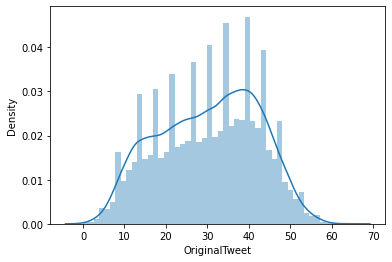

In [21]:
sns.distplot(seqlen)

In [22]:
SEQ_LEN = 70

In [23]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 82.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 75.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 25.5 MB/s eta 0:00:00


In [24]:
from transformers import AutoTokenizer

In [25]:
tokenizer = AutoTokenizer.from_pretrained('albert-base-v2')

Downloading:   0%|          | 0.00/684 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/760k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

In [26]:
tokens = tokenizer.encode_plus(
    "hello world",
    max_length = SEQ_LEN,
    truncation=True,
    padding="max_length",
    add_special_tokens=True,
    return_token_type_ids=False,
    return_attention_mask=True,
    return_tensors='tf'
)

In [27]:
tokens

{'input_ids': <tf.Tensor: shape=(1, 70), dtype=int32, numpy=
array([[    2, 10975,   126,     3,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 70), dtype=int32, numpy=
array([[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0]], dtype=int32)>}

In [28]:
Xids = np.zeros((len(df),SEQ_LEN))
Xmask = np.zeros((len(df),SEQ_LEN))


In [29]:
Xids.shape

(44955, 70)

In [30]:
for i, sequence in enumerate(df['OriginalTweet']):
    tokens = tokenizer.encode_plus(
    sequence,
    max_length = SEQ_LEN,
    truncation=True,
    padding="max_length",
    add_special_tokens=True,
    return_token_type_ids=False,
    return_attention_mask=True,
    return_tensors='tf'
    )
    Xids[i, :], Xmask[i, :] = tokens['input_ids'], tokens['attention_mask']

In [31]:
Xids

array([[2.0000e+00, 4.3690e+03, 1.8410e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e+00, 4.9780e+03, 9.3000e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e+00, 1.3538e+04, 1.4792e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [2.0000e+00, 2.8000e+01, 3.8400e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e+00, 1.3000e+01, 1.3351e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e+00, 3.1000e+01, 1.7000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [32]:
Xmask

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [33]:
df['label'] = df['Sentiment'].factorize()[0]

In [34]:
df['label'].unique

<bound method Series.unique of 0        0
1        1
2        1
3        1
4        2
        ..
44950    1
44951    2
44952    0
44953    2
44954    1
Name: label, Length: 44955, dtype: int64>

In [35]:
arr = df['label'].values
arr.shape

(44955,)

In [36]:
labels = np.zeros((arr.size, arr.max()+1))
labels.shape

(44955, 3)

In [37]:
labels[np.arange(arr.size), arr] = 1
labels

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [38]:
with open('xids.npy', 'wb') as f:
    np.save(f, Xids)
with open('xmask.npy', 'wb') as f:
    np.save(f, Xmask)
with open('label.npy', 'wb') as f:
    np.save(f, labels)

In [39]:
with open('xids.npy', 'rb') as fp:
    Xids = np.load(fp)
with open('xmask.npy', 'rb') as fp:
    Xmask = np.load(fp)
with open('label.npy', 'rb') as fp:
    labels = np.load(fp)

In [40]:
Xids

array([[2.0000e+00, 4.3690e+03, 1.8410e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e+00, 4.9780e+03, 9.3000e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e+00, 1.3538e+04, 1.4792e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [2.0000e+00, 2.8000e+01, 3.8400e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e+00, 1.3000e+01, 1.3351e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0000e+00, 3.1000e+01, 1.7000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [41]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [42]:
dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels))

In [43]:
for i in dataset.take(1):
    print(i)

(<tf.Tensor: shape=(70,), dtype=float64, numpy=
array([2.000e+00, 4.369e+03, 1.841e+03, 1.700e+01, 1.700e+01, 3.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00])>, <tf.Tensor: shape=(70,), dtype=float64, numpy=
array([1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0

In [44]:
def map_func(input_ids, masks, labels):
    return{'input_ids': input_ids, 'attention_mask':masks}, labels

In [45]:
dataset = dataset.map(map_func)

In [46]:
for i in dataset.take(1):
    print(i)

({'input_ids': <tf.Tensor: shape=(70,), dtype=float64, numpy=
array([2.000e+00, 4.369e+03, 1.841e+03, 1.700e+01, 1.700e+01, 3.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00])>, 'attention_mask': <tf.Tensor: shape=(70,), dtype=float64, numpy=
array([1., 1., 1

In [47]:
dataset = dataset.shuffle(1000000).batch(32)

In [48]:
DS_LEN = len(list(dataset))

In [49]:
DS_LEN

1405

In [50]:
SPLIT = 0.8

train = dataset.take(round(DS_LEN*SPLIT))
val = dataset.skip(round(DS_LEN*SPLIT))

# del dataset

In [51]:
from transformers import TFAutoModel

In [52]:
bert = TFAutoModel.from_pretrained('albert-base-v2')

Downloading:   0%|          | 0.00/63.0M [00:00<?, ?B/s]

Some layers from the model checkpoint at albert-base-v2 were not used when initializing TFAlbertModel: ['predictions']
- This IS expected if you are initializing TFAlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFAlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFAlbertModel were initialized from the model checkpoint at albert-base-v2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFAlbertModel for predictions without further training.


In [53]:
input_ids = tf.keras.layers.Input(shape=(SEQ_LEN,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(SEQ_LEN,), name='attention_mask', dtype='int32')

embeddings = bert(input_ids, attention_mask=mask)[0]

X = tf.keras.layers.GlobalMaxPooling1D()(embeddings)
X = tf.keras.layers.BatchNormalization()(X)
# X = tf.keras.layers.Dense(32, activation = 'relu')(X)
# X = tf.keras.layers.Dropout(0.1)(X)
X = tf.keras.layers.Dense(32, activation = 'relu')(X)
y = tf.keras.layers.Dense(3, activation = 'softmax' , name = 'outputs')(X)

model = tf.keras.Model(inputs=[input_ids, mask], outputs = y)

In [54]:
model.layers[2].trainable = False

In [55]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 70)]         0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 70)]         0           []                               
                                                                                                  
 tf_albert_model (TFAlbertModel  TFBaseModelOutputWi  11683584   ['input_ids[0][0]',              
 )                              thPooling(last_hidd               'attention_mask[0][0]']         
                                en_state=(None, 70,                                               
                                 768),                                                        

In [56]:
optimizer = tf.keras.optimizers.Adam(0.01)
loss = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

In [57]:
model.compile(optimizer='rmsprop', loss=loss, metrics=['acc'])
# model.compile(optimizer=optimizer, loss=loss, metrics=[acc])


In [ ]:
history = model.fit(
    train,
    validation_data = val,
    epochs = 100
)

Epoch 1/100
1124/1124 [==============================] - 259s 220ms/step - loss: 0.9040 - acc: 0.5810 - val_loss: 0.7962 - val_acc: 0.6406
Epoch 2/100
1124/1124 [==============================] - 245s 217ms/step - loss: 0.8127 - acc: 0.6320 - val_loss: 0.7467 - val_acc: 0.6699
Epoch 3/100
1124/1124 [==============================] - 245s 217ms/step - loss: 0.7772 - acc: 0.6516 - val_loss: 0.7308 - val_acc: 0.6785
Epoch 4/100
1124/1124 [==============================] - 244s 217ms/step - loss: 0.7550 - acc: 0.6656 - val_loss: 0.7039 - val_acc: 0.6917
Epoch 5/100
1124/1124 [==============================] - 244s 217ms/step - loss: 0.7284 - acc: 0.6794 - val_loss: 0.6733 - val_acc: 0.7094
Epoch 6/100
1124/1124 [==============================] - 245s 217ms/step - loss: 0.7111 - acc: 0.6889 - val_loss: 0.6335 - val_acc: 0.7328
Epoch 7/100
1124/1124 [==============================] - 244s 217ms/step - loss: 0.6896 - acc: 0.7025 - val_loss: 0.6119 - val_acc: 0.7394
Epoch 8/100
1124/1124 [====

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))